In [2]:
from standard_imports import *
np.set_printoptions(precision = 15, linewidth=700, suppress=False)
%load_ext autoreload
%autoreload 2

In [18]:
ML =4 
d_vec = np.array([0,0,0])   

dat = np.load(file_location(d_vec, ML))
z_d = dat['z_d_results']
q_2 = dat['q_2']
zeros = dat['zeros']
asymptotes = dat['asymptotes']

print(asymptotes[8])

9.0


In [17]:
ML1 =4 
d_vec1 = np.array([1,0,0])   

dat = np.load(file_location(d_vec1, ML1))
z_d1 = dat['z_d_results']
q_21 = dat['q_2']
zeros1 = dat['zeros']
asymptotes1 = dat['asymptotes']


print(asymptotes1[8])

6.015779500086


In [5]:

x1 = np.linspace(0.01, 8, 400)
coll= np.load("derivative_graph_000.npy")
First1, Second1 = coll[:,0], coll[:,1]


dx = np.diff(q_2)[0]
D1_1 = np.diff(z_d)/dx
D1_x_1 = q_2[:-1] + dx/2


#using central difference method

zeta_plus_1 = z_d[1:]
zeta_minus_1 = z_d[:-1]

D2_1 = (zeta_plus_1[1:] + zeta_minus_1[:-1] - 2*z_d[1:-1])/dx**2

D2_x_1 = q_2[1:-1]



In [6]:
x2 = np.linspace(0.01, 4.472352389548, 400)
coll= np.load("derivative_graph_001.npy")
First2, Second2 = coll[:,0], coll[:,1]

dx = np.diff(q_21)[0]
D1_2 = np.diff(z_d1)/dx
D1_x_2 = q_21[:-1] + dx/2


#using central difference method

zeta_plus_2 = z_d1[1:]
zeta_minus_2 = z_d1[:-1]

D2_2 = (zeta_plus_2[1:] + zeta_minus_2[:-1] - 2*z_d1[1:-1])/dx**2

D2_x_2= q_21[1:-1]



In [7]:
D1_x_1, D1_1
x1, First1


D2_x_1, D2_1
x1, Second1


x2, First2
D1_x_2, D1_2


x2, Second2
D2_x_2, D2_2


(array([2.001693984304051e-03, 4.003387968608101e-03, 6.005081952912153e-03, ..., 1.200215712988709e+01, 1.200415882387139e+01, 1.200616051785570e+01]),
 array([2.349366763478646e+02, 2.436588179836183e+02, 2.527908043484985e+02, ..., 5.977246731896957e+06, 2.390586725655007e+07, 1.584332693690776e+18]))

(0.0, 80.0)

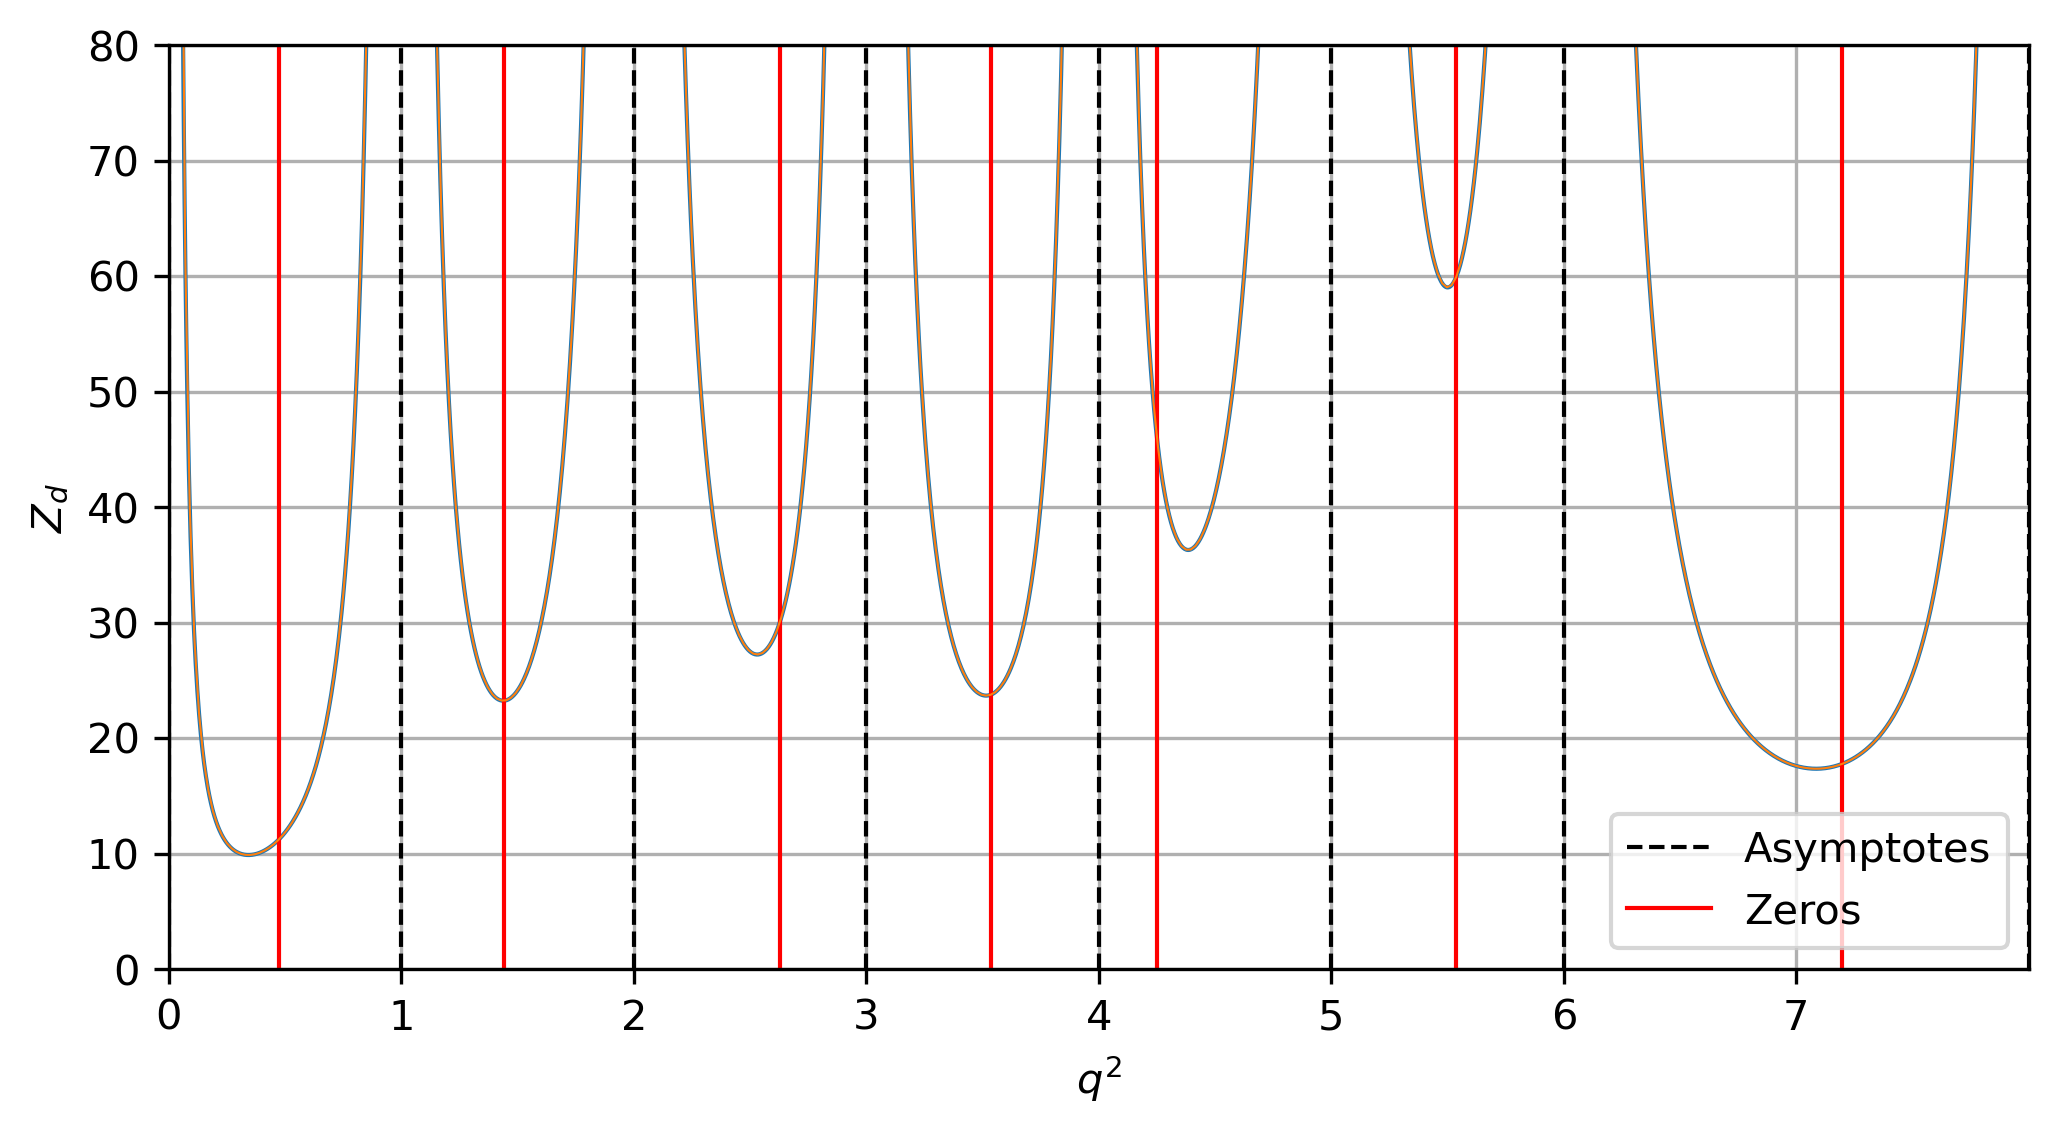

In [8]:
%matplotlib inline

plt.figure(figsize=(8, 4), dpi = 300)
plot_nice(D1_x_1, D1_1, asymptotes[:8], zeros)
plt.plot(x1, First1, label = "Analytical Derivative", linewidth = 0.5)
plt.ylim(0,80)


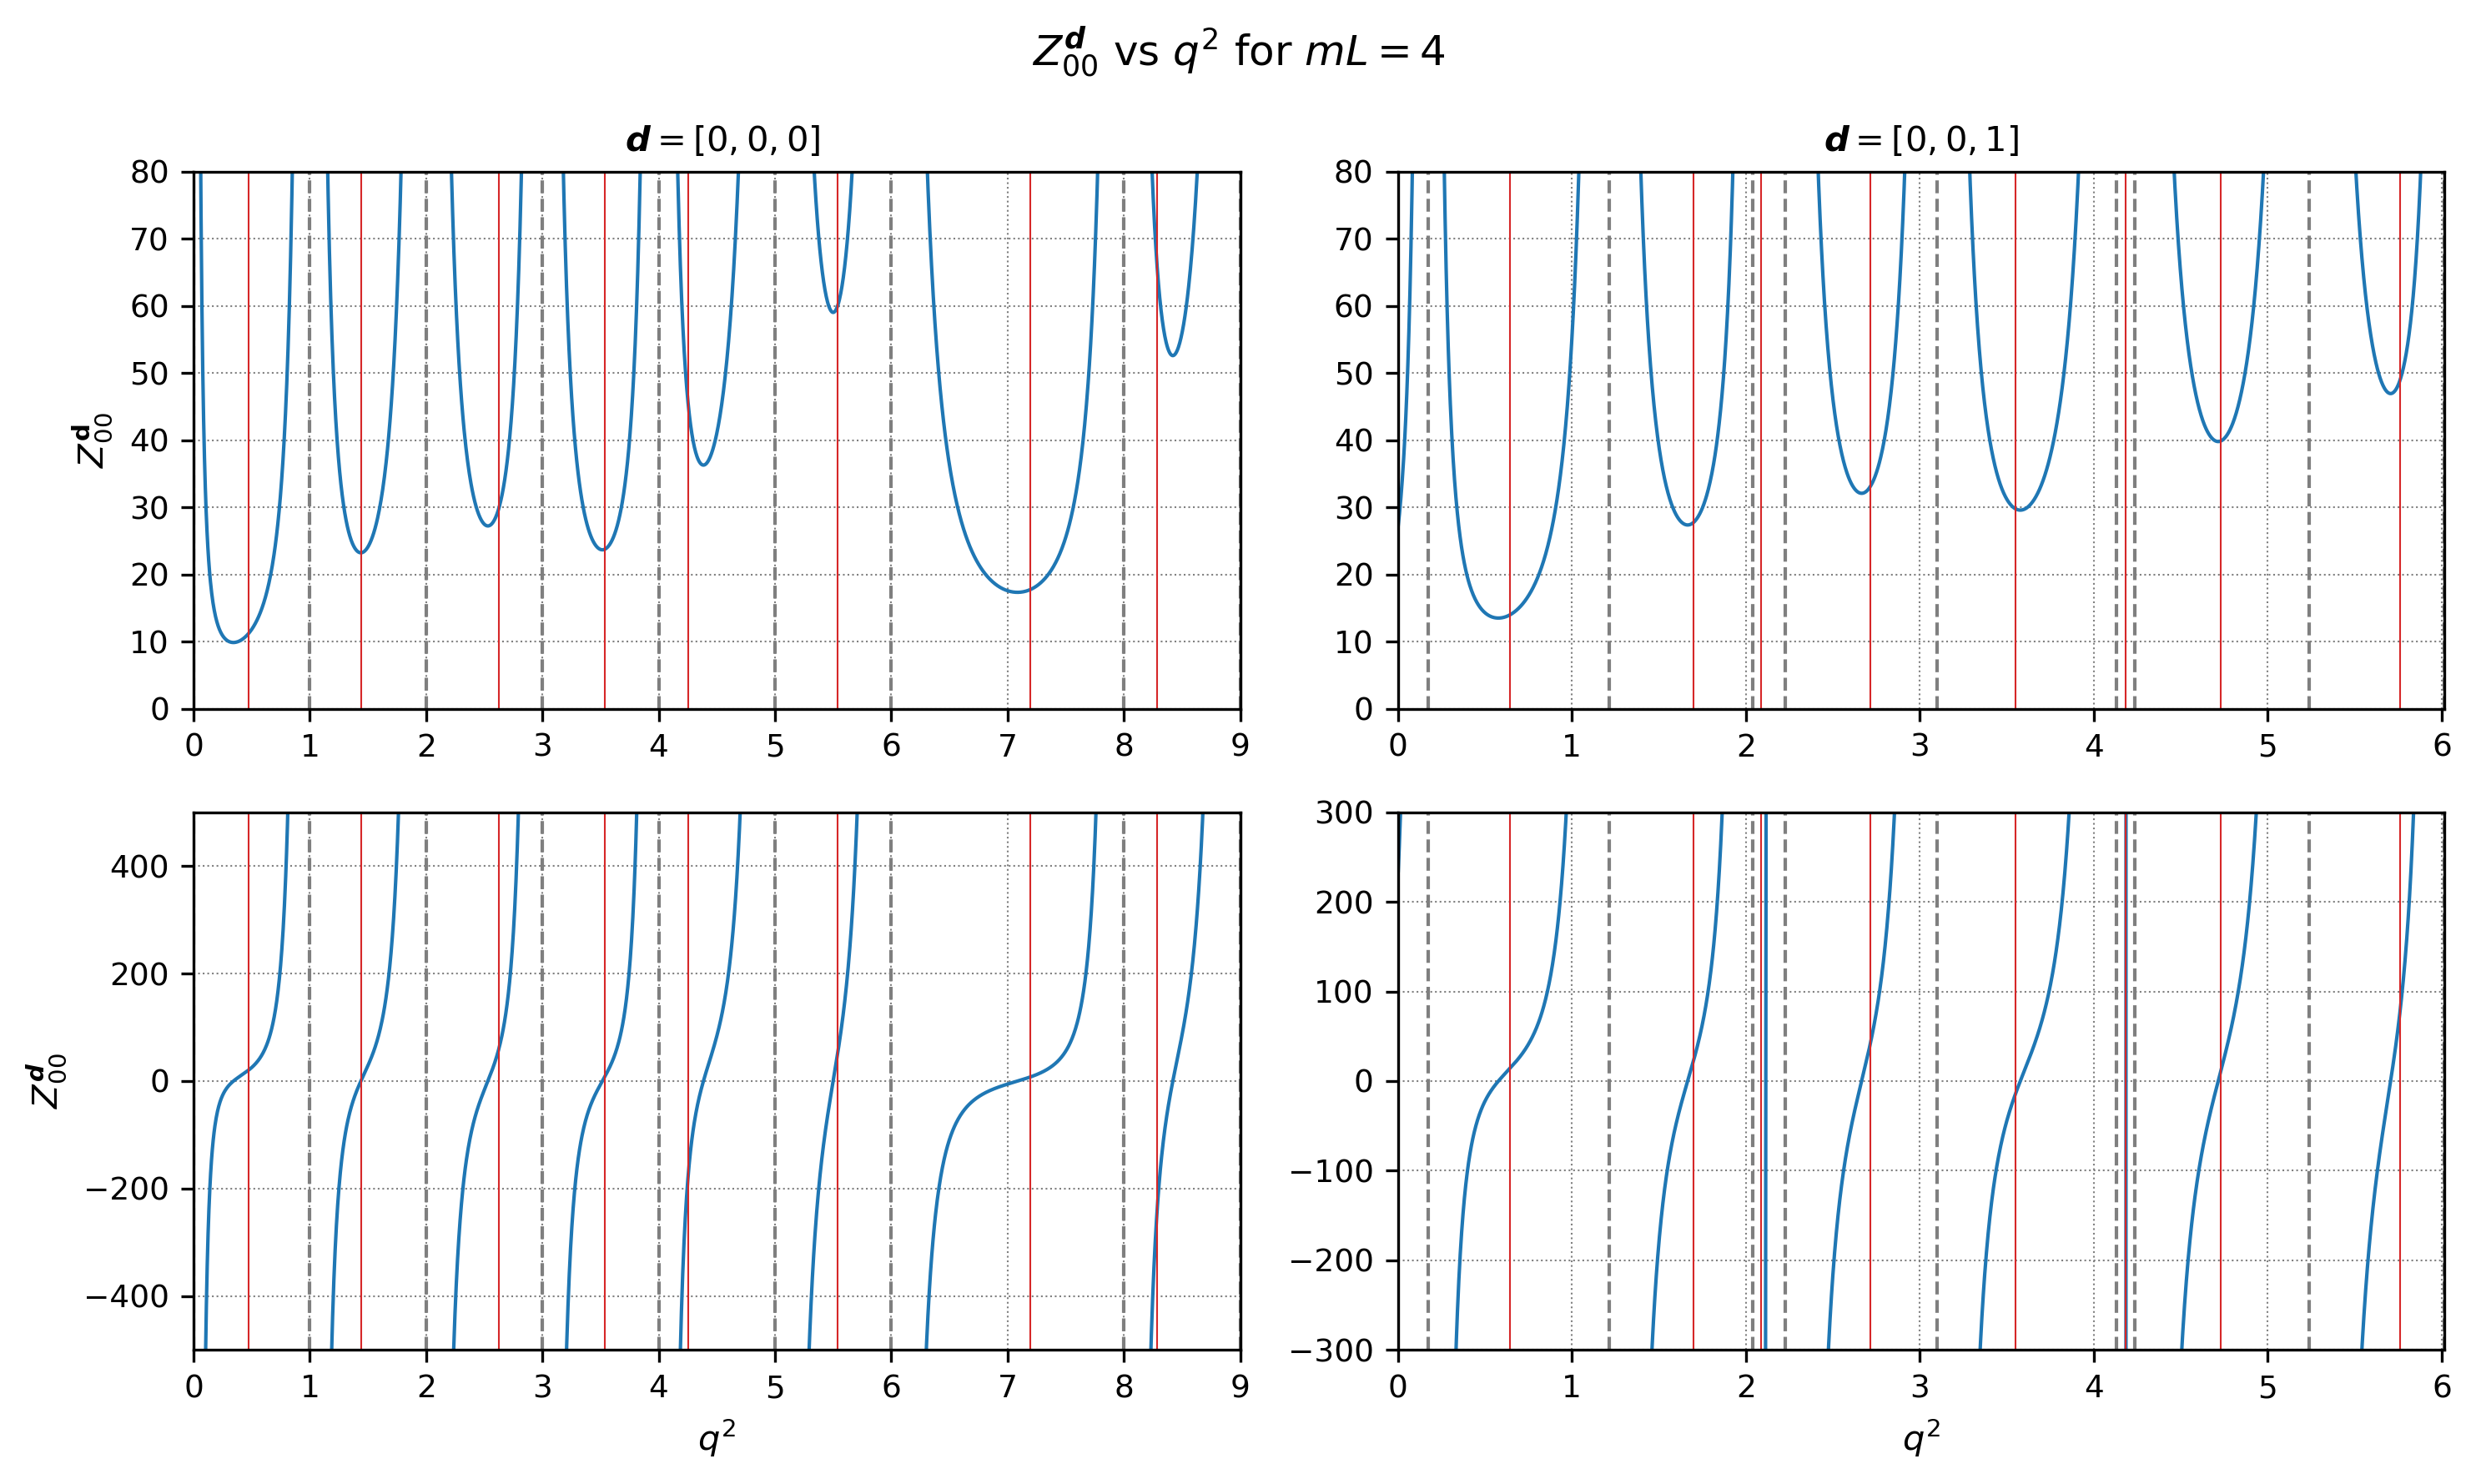

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

def plot_nice(q_2=np.array([]), z_d_results=np.array([]), asymptotes=np.array([]), zeros=np.array([]), d_vec=np.array([0,0,1]), ax=None):
    if ax is None:
        ax = plt.gca()
        
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    
    # Handling extreme values
    z_d_plot[np.abs(z_d_plot) > 3e5] = np.nan

    # Plotting the main curve
    ax.plot(q_2_plot, z_d_plot, linewidth=1, label="$Z_d$ curve", color = 'tab:blue')
    
    # Asymptotes
    for i in first_asymptotes:
        ax.axvline(i, linestyle="--", color = 'tab:grey', linewidth=1, label="Asymptote" if i == first_asymptotes[0] else "")
    
    # Zeros
    for i in zeros:
        ax.axvline(i, color = 'tab:red', linewidth=0.5,  label="Zero" if i == zeros[0] else "")

    # Labels and limits
    #ax.set_xlabel("$q^2$", fontsize=12) 
    #ax.set_ylabel("$Z_d$", fontsize=12)
    ax.set_xlim(0, first_asymptotes[-1])
    ax.set_ylim(-50, 50)

    # Tick marks
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x / 50)
    ax.set_xticks(np.arange(0, max_x, steps))
    ax.tick_params(axis='both', which='major', labelsize=9)

    # Grid and legend
    ax.grid(True, which='major', linestyle=':', linewidth='0.5', color='grey')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Removing duplicates
    #ax.legend(by_label.values(), by_label.keys(), fontsize=9, loc='upper right')

    # Title (optional, depending on use case)
    # ax.set_title("Title Here", fontsize=14)

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(10, 6), dpi=300)
plt.subplots_adjust(hspace=0.3, wspace=0.3, right=0.75) 



D1_x_1, D1_1
x1, First1

# Plot for zeta_d
plot_nice(D1_x_1, D1_1, asymptotes, zeros, d_vec, ax=axs[0, 0])
#axs[0, 0].plot(x1, First1, color = 'tab:green', linewidth = 0.5)
axs[0, 0].set_xlim(0, asymptotes[8])
axs[0, 0].set_ylabel('$Z_{{00}}^{\\bf d}$')
axs[0, 0].set_title(' ${\\boldsymbol{d}}  = [0,0,0]$', fontsize=10)
axs[0, 0].set_ylim(0, 80)



x2, First2
D1_x_2, D1_2
# Plot for zeta_d1
plot_nice(D1_x_2, D1_2, asymptotes1, zeros1, d_vec1, ax=axs[0, 1])
#axs[0, 1].plot(x2, First2)
axs[0, 1].set_xlim(0, asymptotes1[8])
#axs[0, 1].set_ylabel('$Z^{\\bf d}$')
axs[0, 1].set_title('${\\boldsymbol{d}}  = [0,0,1]$', fontsize=10)
axs[0, 1].set_ylim(0, 80)


D2_x_1, D2_1
x1, Second1
# Plot for zeta_d2
plot_nice(D2_x_1, D2_1, asymptotes, zeros, d_vec, ax=axs[1, 0])
#axs[1, 0].plot(x1, Second1)
axs[1, 0].set_xlim(0, asymptotes[8])
axs[1, 0].set_ylabel('$Z_{{00}}^{\\boldsymbol{d}}$')
axs[1, 0].set_xlabel("$q^2$") 
axs[1, 0].set_ylim(-500, 500)


x2, Second2
D2_x_2, D2_2
# Plot for zeta_d3
plot_nice(D2_x_2, D2_2, asymptotes1, zeros1, d_vec1, ax=axs[1, 1])
#axs[1, 1].plot(x2, Second2)
#plt.plot(x2, Second2)
axs[1, 1].set_xlim(0, asymptotes1[8])
#axs[1, 1].set_ylabel('$Z^{\\bf d}$')
axs[1, 1].set_xlabel("$q^2$") 
axs[1, 1].set_ylim(-300, 300)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=2),
                Line2D([0], [0], color='tab:grey', lw=1, linestyle='--', label='Asymptote'),
                Line2D([0], [0], color='tab:red', lw=0.5, label='Zero')]

# Place a single legend outside the subplots
#fig.legend(custom_lines, ['$Z_d$ curve', 'Asymptote', 'Zero'], loc='center left', ncol=1, bbox_to_anchor=(1, 0.5), fontsize=12)


plt.suptitle('$Z_{{00}}^{\\boldsymbol{d}}$ vs $q^2$ for $mL = 4$')
plt.tight_layout()

plt.show()

In [100]:

prefix = "$x_{" 
affix = "}^{\\raisebox{-0.5ex}{\\text{\\tiny (0)}}}$"

prefix = "$x_{\\raisebox{0.5ex}{\\text{\\tiny" 
affix = "}}}^{\\raisebox{-1ex}{\\text{\\tiny (0)}}}$"



# prefix =  'x_{' 
# affix = '}^{(0)} '
print(affix)

}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$


In [101]:
for i in range(1,16):
    print( prefix + str(i) + affix  )

$x_{\raisebox{0.5ex}{\text{\tiny1}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny2}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny3}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny4}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny5}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny6}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny7}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny8}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny9}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny10}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny11}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny12}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny13}}}^{\raisebox{-1ex}{\text{\tiny (0)}}}$
$x_{\raisebox{0.5ex}{\text{\tiny14

In [102]:
for i in range(1,16):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
